# Importing all the libraries.

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
from matplotlib import pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
  

# Initializing Snowball Stemmer and the provided DataFrame

In [ ]:
snow_stemmer = SnowballStemmer(language='english')
df=pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding = "ISO-8859-1")

# Dropping null data for tweet_text column.

In [288]:
df.dropna(subset=["tweet_text"],inplace=True)

In [289]:
df.isnull().sum()

tweet_text                                               0
emotion_in_tweet_is_directed_at                       5801
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

# Function for adding all the mentioned company name in an array. 

In [290]:
company_name=df['emotion_in_tweet_is_directed_at'].unique()
print(company_name)
comp_name=[]
for cname in company_name:
    if isinstance(cname, str):
        comp_name.append(cname)
comp_name

['iPhone' 'iPad or iPhone App' 'iPad' 'Google' nan 'Android' 'Apple'
 'Android App' 'Other Google product or service'
 'Other Apple product or service']


['iPhone',
 'iPad or iPhone App',
 'iPad',
 'Google',
 'Android',
 'Apple',
 'Android App',
 'Other Google product or service',
 'Other Apple product or service']

# Function for parsing company names from tweet for missing data.

In [291]:

def getname(row):  
    dword=""
    dsize=1000
    tweet=nltk.word_tokenize(row)
    for word in tweet:
        if word in comp_name:
            return word
        else:
            w=set(word)         
            for n in comp_name:
                w1=set(n)
                diff=w1.symmetric_difference(w)
                tsize=len(diff)
                if tsize<=dsize:
                    dsize=tsize                    
                    dword=n
    return dword
            

# Calling the function and storing the returned value. 

In [292]:

df['emotion_in_tweet_is_directed_at']=df.apply(lambda x:getname(x['tweet_text']) if pd.isnull(x['emotion_in_tweet_is_directed_at']) else x['emotion_in_tweet_is_directed_at'],axis=1)
df[6:]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",Google,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",Google,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,iPhone,No emotion toward brand or product


In [293]:
df.isnull().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

# Cleaning Data
<b>1. Removing HyperLinks<br>
2. Removing Email ids<br>
3. Removing Extra Spaces<br>
4. Removing everything except Alphabet</b>

In [294]:
df['Clean_Tweet_Text']=[re.sub(r'[(https|http)://]?[www\.]?[a-zA-Z0-9]+\.[(com)|(org)|(edu)]+','',str(x)) for x in df['tweet_text']]
df['Clean_Tweet_Text']=[re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b','',str(x)) for x in df['Clean_Tweet_Text']]
df['Clean_Tweet_Text']=[re.sub(r'[\s]+',' ',str(x)) for x in df['Clean_Tweet_Text']]
df['Clean_Tweet_Text']=[re.sub(r'[^(a-z|A-Z|)]',' ',str(x)) for x in df['Clean_Tweet_Text']]
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,Clean_Tweet_Text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley I have a G iPhone After hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee Know about fludapp Awesome iPad i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin Can not wait for iPad also The...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw I hope this year s festival isn t as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on Fri SXSW Marissa M...
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,Ipad everywhere SXSW link
9089,"Wave, buzz... RT @mention We interrupt your re...",Google,No emotion toward brand or product,Wave buzz RT mention We interrupt your re...
9090,"Google's Zeiger, a physician never reported po...",Google,No emotion toward brand or product,Google s Zeiger a physician never reported po...
9091,Some Verizon iPhone customers complained their...,iPhone,No emotion toward brand or product,Some Verizon iPhone customers complained their...


# Displaying Stacked bar graph for positive , negative and neutral tweets with respect to company and it's company products. 

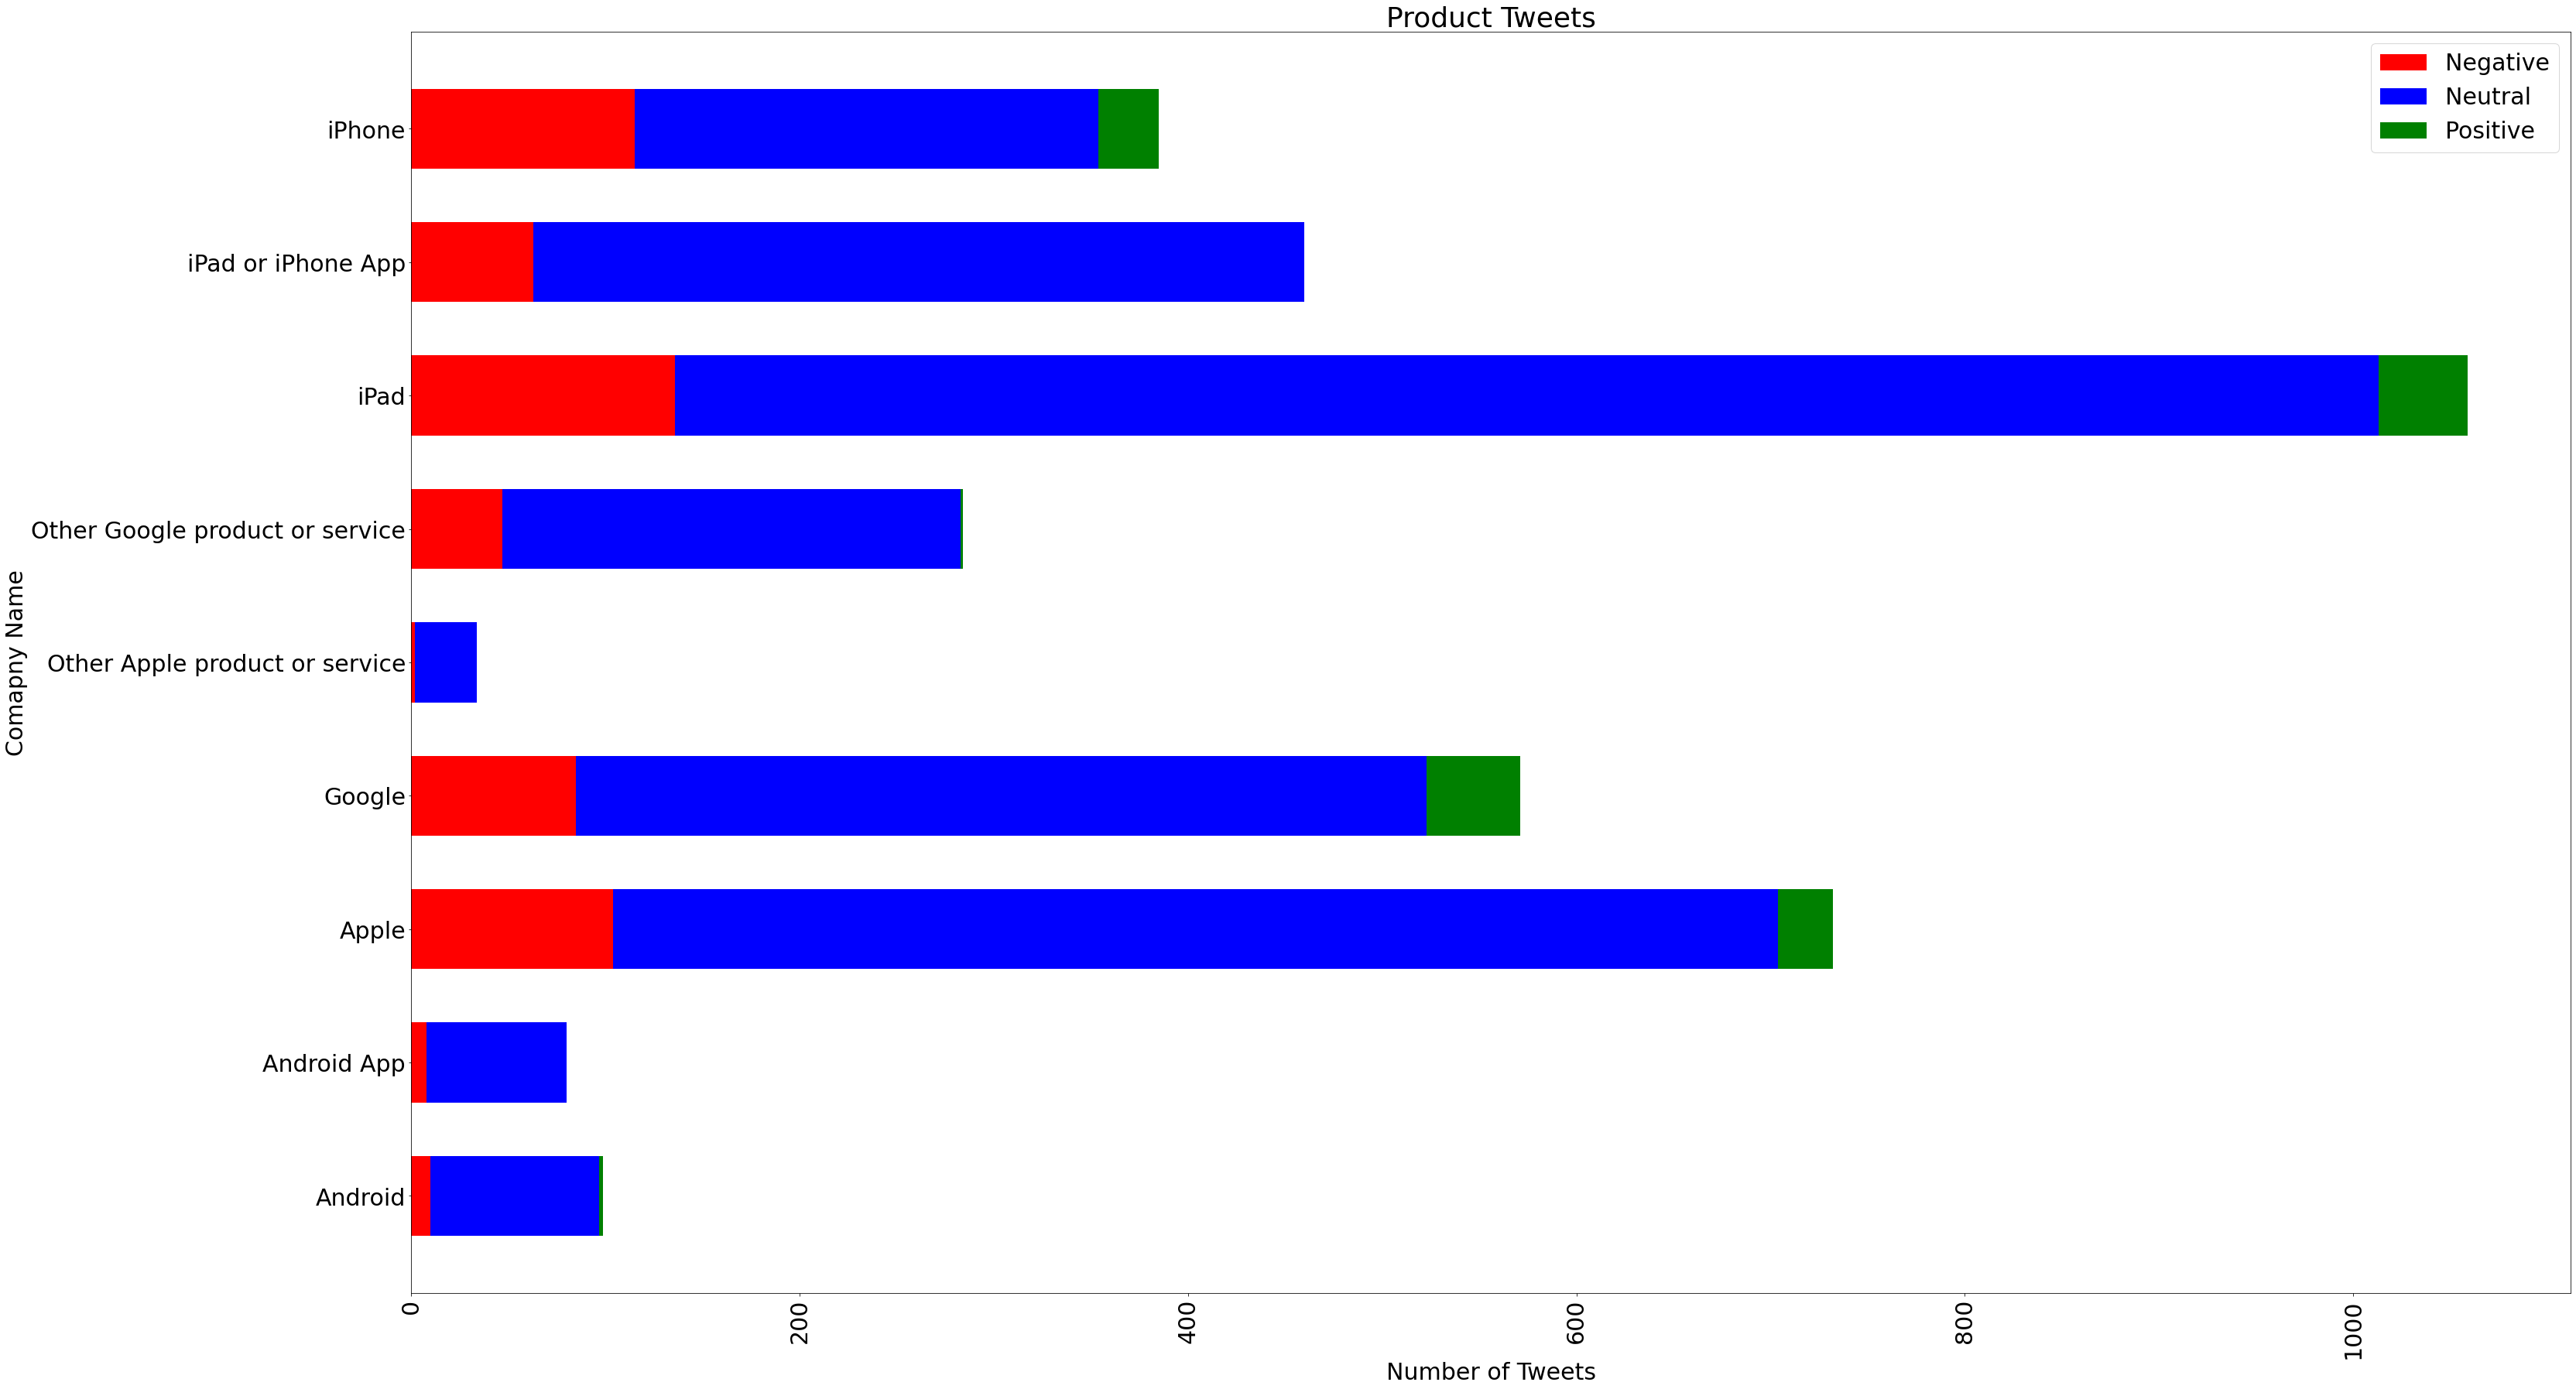

In [477]:
edf=df.groupby(['emotion_in_tweet_is_directed_at','is_there_an_emotion_directed_at_a_brand_or_product']).count()
# f,a=plt.subplots(2,1)
edf=edf.unstack()
edf=edf.drop('Clean_Tweet_Text',axis=1)
edf=edf.reset_index()
edf=edf.fillna(0)
pro_name=list(edf.iloc[:,0])
cant_tell=edf.iloc[:,1]
negative=list(edf.iloc[:,2])
neutral=list(edf.iloc[:,3])
positive=list(edf.iloc[:,4])

plt.figure(figsize =(50, 30))
plt.rcParams.update({'font.size': 30})
plt.barh(pro_name,negative,0.6,label="Negative",color="Red")
plt.barh(pro_name,neutral,0.6,left=negative,label="Neutral",color='Blue')
plt.barh(pro_name,positive,0.6,left=list(np.add(negative,neutral)),label="Positive",color="Green")
plt.ylabel("Comapny Name")
plt.xlabel("Number of Tweets")
plt.title("Product Tweets")
plt.legend()
ax = plt.gca()

plt.xticks(rotation=90)
plt.show()


# Combining the products with company and displaying positive negative and neutral tweets only for company 

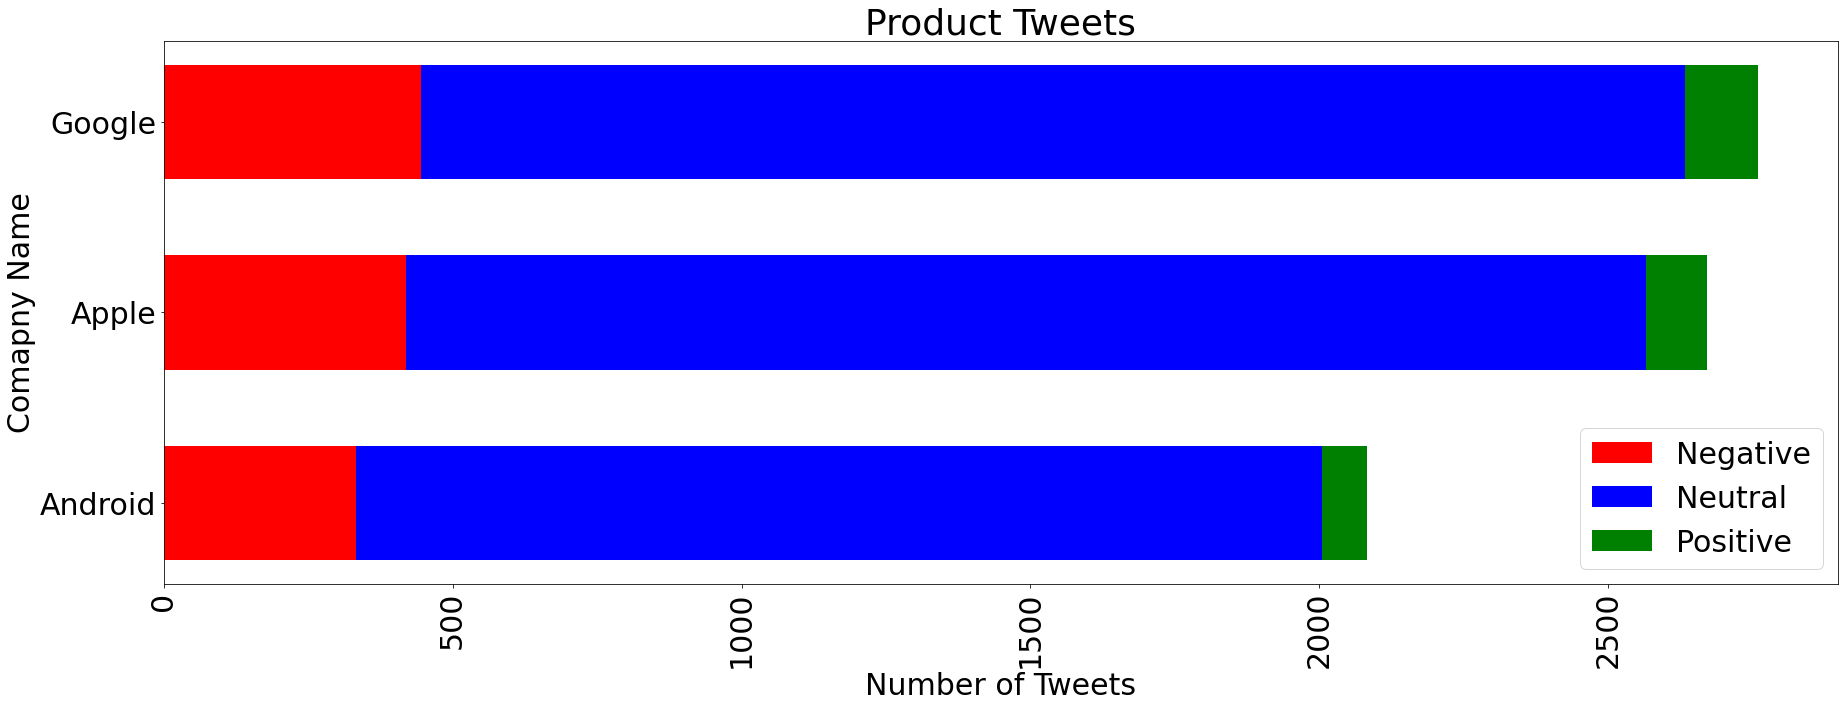

In [479]:
c_name=['Android','Apple','Google']
emotion=["Negative","Positive","Neutral"]
ne=[0,0,0]
pos=[0,0,0]
neu=[0,0,0]
comb_data=[0,0,0]

for w in c_name:
    for w1 in pro_name:
        if w1.find(w)!=-1:            
            i=pro_name.index(w1)
            j=c_name.index(w)            
            ne[j]+=negative[i]
            pos[j]+=positive[i]
            neu[j]+=neutral[i]
        elif w1.find('iPhone')!=-1 or w1.find('iPad')!=-1:            
            i=pro_name.index(w1)
            j=c_name.index(w)            
            ne[j]+=negative[i]
            pos[j]+=positive[i]
            neu[j]+=neutral[i]

plt.figure(figsize =(30, 10))
plt.rcParams.update({'font.size': 30})
plt.barh(c_name,ne,0.6,label="Negative",color="Red")
plt.barh(c_name,neu,0.6,left=ne,label="Neutral",color='Blue')
plt.barh(c_name,pos,0.6,left=list(np.add(ne,neu)),label="Positive",color="Green")
plt.ylabel("Comapny Name")
plt.xlabel("Number of Tweets")
plt.title("Product Tweets")
plt.legend()
ax = plt.gca()

plt.xticks(rotation=90)
plt.show()

# Removing Stopwords and processing the text further.

In [298]:
df['Processed_Text']=df.iloc[:,3].apply(lambda x:word_tokenize(x))
stop_words = set(stopwords.words('english'))
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,Clean_Tweet_Text,Processed_Text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley I have a G iPhone After hrs twe...,"[wesley, I, have, a, G, iPhone, After, hrs, tw..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee Know about fludapp Awesome iPad i...,"[jessedee, Know, about, fludapp, Awesome, iPad..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin Can not wait for iPad also The...,"[swonderlin, Can, not, wait, for, iPad, also, ..."
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw I hope this year s festival isn t as cra...,"[sxsw, I, hope, this, year, s, festival, isn, ..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on Fri SXSW Marissa M...,"[sxtxstate, great, stuff, on, Fri, SXSW, Maris..."
...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,Ipad everywhere SXSW link,"[Ipad, everywhere, SXSW, link]"
9089,"Wave, buzz... RT @mention We interrupt your re...",Google,No emotion toward brand or product,Wave buzz RT mention We interrupt your re...,"[Wave, buzz, RT, mention, We, interrupt, your,..."
9090,"Google's Zeiger, a physician never reported po...",Google,No emotion toward brand or product,Google s Zeiger a physician never reported po...,"[Google, s, Zeiger, a, physician, never, repor..."
9091,Some Verizon iPhone customers complained their...,iPhone,No emotion toward brand or product,Some Verizon iPhone customers complained their...,"[Some, Verizon, iPhone, customers, complained,..."


# Stemming but wasn't very helpful for this dataframe and therefore commented it. 

In [481]:
#Stemming


def remover(p):
    for rword in p:
        if rword in stop_words or len(rword)<=2:
            p.remove(rword)
    return p
# def stemer(p):
#     for word in p:
#         p[p.index(word)]=snow_stemmer.stem(word)
#     return p

df['Processed_Text']=df['Processed_Text'].apply(lambda x:remover(x))
df
# # df['Processed_Text'].apply(lambda x : stemer(x))


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,Clean_Tweet_Text,Processed_Text,Adjectives,Hashed,label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley I have a G iPhone After hrs twe...,"[wesley, iPhone, After, hrs, tweeting, RISE, A...","[dead, upgrade]","[655, 593]",1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee Know about fludapp Awesome iPad i...,"[jessedee, Know, fludapp, Awesome, iPad, iPhon...","[likely, free]","[421, 523]",3
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin Can not wait for iPad also The...,"[swonderlin, Can, wait, iPad, also, They, sale...",[],[],3
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw I hope this year s festival isn t as cra...,"[sxsw, hope, year, festival, crashy, year, iPh...",[],[],1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on Fri SXSW Marissa M...,"[sxtxstate, great, stuff, Fri, SXSW, Marissa, ...",[great],[405],3
...,...,...,...,...,...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion,mention your PR guy just convinced me to swit...,"[mention, guy, convinced, switch, back, iPhone...",[sxsw],[787],3
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion,quot papyrus sort of like the ipad quot ...,"[quot, papyrus, sort, like, ipad, quot, nice, ...",[nice],[214],3
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion,Diller says Google TV quot might be run over ...,"[Diller, says, Google, quot, might, run, PlayS...",[ready],[73],1
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion,I ve always used Camera for my iPhone b c it ...,"[always, used, Camera, iPhone, image, stabiliz...","[app, same]","[209, 928]",3


# Performed Lemmatization and used wordnet lemmatizer to extract adjectives from the text to get a better idea of the reviews. 

In [359]:
df
# Lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
def lemma(p):
    
    tag=nltk.pos_tag(p)
    tag=list(tag)
    adj=[]
    for w in tag:        
        if w[1]=='JJ' or w[1]=='JJS':            
            adj.append(w[0])    
    return adj
    
df['Adjectives']=df['Processed_Text'].apply(lambda x:lemma(x))
print(df['Adjectives'])

0         [dead, upgrade]
1          [likely, free]
2                      []
3                      []
4                 [great]
              ...        
9088                   []
9089                [big]
9090    [potential, quot]
9091                   []
9092                   []
Name: Adjectives, Length: 9092, dtype: object


# Performed Hashing on the Adjectives and stored the values into another column. 

In [362]:
def ssb(da):
    nd=[]
    for i in range(len(da)):
        nd.append(hash(da[i])%1000)
    return nd


In [384]:
df['Hashed']=df.apply(lambda x:ssb(x['Adjectives']),axis=1)
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,Clean_Tweet_Text,Processed_Text,Adjectives,Hashed,label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley I have a G iPhone After hrs twe...,"[wesley, have, G, iPhone, After, hrs, tweeting...","[dead, upgrade]","[655, 593]",227
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee Know about fludapp Awesome iPad i...,"[jessedee, Know, fludapp, Awesome, iPad, iPhon...","[likely, free]","[421, 523]",593
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin Can not wait for iPad also The...,"[swonderlin, Can, wait, iPad, also, They, sale...",[],[],1401
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw I hope this year s festival isn t as cra...,"[sxsw, hope, year, festival, t, crashy, this, ...",[],[],1456
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on Fri SXSW Marissa M...,"[sxtxstate, great, stuff, Fri, SXSW, Marissa, ...",[great],[405],1518
...,...,...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,Ipad everywhere SXSW link,"[Ipad, everywhere, SXSW, link]",[],[],4241
9089,"Wave, buzz... RT @mention We interrupt your re...",Google,No emotion toward brand or product,Wave buzz RT mention We interrupt your re...,"[Wave, buzz, mention, interrupt, regularly, sc...",[big],[8],8210
9090,"Google's Zeiger, a physician never reported po...",Google,No emotion toward brand or product,Google s Zeiger a physician never reported po...,"[Google, Zeiger, physician, never, reported, p...","[potential, quot]","[946, 170]",3321
9091,Some Verizon iPhone customers complained their...,iPhone,No emotion toward brand or product,Some Verizon iPhone customers complained their...,"[Some, Verizon, iPhone, customers, complained,...",[],[],7525


*The adjectives and hashing wast just to display the hashing method as i chosed Logistic regression and founded the clean tweet text more useful*

# Transformed the emotions into numerical values to use for ML Model.

In [482]:
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
df['label']= label_encoder.fit_transform(df['is_there_an_emotion_directed_at_a_brand_or_product'])
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,Clean_Tweet_Text,Processed_Text,Adjectives,Hashed,label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley I have a G iPhone After hrs twe...,"[wesley, iPhone, After, hrs, tweeting, RISE, A...","[dead, upgrade]","[655, 593]",1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee Know about fludapp Awesome iPad i...,"[jessedee, Know, fludapp, Awesome, iPad, iPhon...","[likely, free]","[421, 523]",2
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin Can not wait for iPad also The...,"[swonderlin, Can, wait, iPad, also, They, sale...",[],[],2
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw I hope this year s festival isn t as cra...,"[sxsw, hope, year, festival, crashy, year, iPh...",[],[],1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on Fri SXSW Marissa M...,"[sxtxstate, great, stuff, Fri, SXSW, Marissa, ...",[great],[405],2
...,...,...,...,...,...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion,mention your PR guy just convinced me to swit...,"[mention, guy, convinced, switch, back, iPhone...",[sxsw],[787],2
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion,quot papyrus sort of like the ipad quot ...,"[quot, papyrus, sort, like, ipad, quot, nice, ...",[nice],[214],2
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion,Diller says Google TV quot might be run over ...,"[Diller, says, Google, quot, might, run, PlayS...",[ready],[73],1
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion,I ve always used Camera for my iPhone b c it ...,"[always, used, Camera, iPhone, image, stabiliz...","[app, same]","[209, 928]",2


# Vectorized the Clean_Tweet_Text data for training the model.

In [445]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['Clean_Tweet_Text'])
df.drop(df[df['is_there_an_emotion_directed_at_a_brand_or_product'] =='No emotion toward brand or product'].index, inplace = True)
# bow.toarray()

# Training the model using label and Vectorized data with test_size of 0.35th of the data.

In [470]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df['label'],random_state=42,test_size=0.35)


In [471]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [472]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# Testing the model and used macro becaus had three values and not binary and got an accuracy of around 0.82

In [473]:
pred=model.predict(x_test)
f1_score(y_test,pred,average='macro')
accuracy_score(y_test,pred)

0.8249807247494217

# Thank You
*Thank you for this , really enjoyed and learnt a lot. It would be really helpful if you could provide  further guidelines for ML and how to get better everyday on this .Because looking by the ML models on youtube and ML projects it feels we haven't even scratched the surface yet.*
